In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    path = "font/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다. 
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
data = pd.read_csv('./data/주택도시보증공사_보증사고현황_20201231.csv', encoding='CP949')

In [5]:
df = data[data['보증종류'] == '전세보증금반환보증']
df

,연도,보증종류,건수,금액(억원)
17,2016,전세보증금반환보증,27,34
38,2017,전세보증금반환보증,33,74
59,2018,전세보증금반환보증,372,792
81,2019,전세보증금반환보증,1630,3442
104,2020,전세보증금반환보증,2408,4682


In [6]:
df = df.append({'연도': 2021, '보증종류': '전세보증금반환보증','건수': 2799, '금액(억원)': 5790},ignore_index=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10156\2460894348.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'연도': 2021, '보증종류': '전세보증금반환보증','건수': 2799, '금액(억원)': 5790},ignore_index=True)


In [7]:
df['건수'] = pd.to_numeric(df['건수'])
df['금액(억원)'] = pd.to_numeric(df['금액(억원)'])

In [12]:
df

,연도,보증종류,건수,금액(억원)
0,2016,전세보증금반환보증,27,34
1,2017,전세보증금반환보증,33,74
2,2018,전세보증금반환보증,372,792
3,2019,전세보증금반환보증,1630,3442
4,2020,전세보증금반환보증,2408,4682
5,2021,전세보증금반환보증,2799,5790


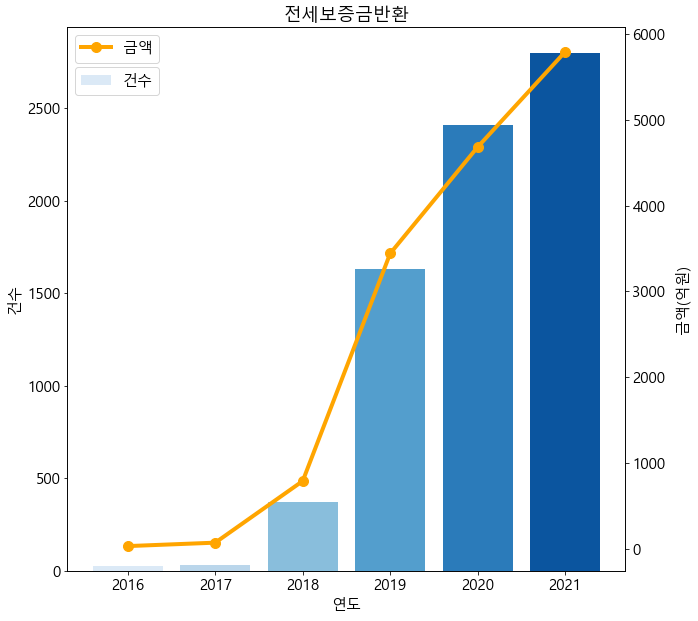

In [137]:
colors = sns.color_palette('Blues',len(df['연도']))

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 10)

fig, ax1 = plt.subplots()

ax1.bar(df['연도'], df['건수'], color=colors, label='건수')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.94))
ax1.set_xlabel('연도')
ax1.set_ylabel('건수')

ax2 = ax1.twinx()
ax2.plot(df['연도'], df['금액(억원)'], linewidth=4, color ='orange', marker='o', markersize=10, label='금액')
ax2.legend(loc='upper left')
ax2.set_ylabel('금액(억원)', labelpad=10)

plt.title('전세보증금반환')
plt.show()

In [26]:
list(df['연도'])

[2016, 2017, 2018, 2019, 2020, 2021]